<a href="https://colab.research.google.com/github/Deepthishanmugam/Sales_Forecasting_Complete/blob/main/Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing necessary libraries & Installing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

from plotly.offline import init_notebook_mode, iplot
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from scipy.stats import chi2_contingency
from scipy.stats import zscore

###**Downloading necessary.csv file**
 - Since there are two files we are downloading them separately

In [2]:
!gdown "https://drive.google.com/drive/folders/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn"

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn
To: /content/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn
1.23MB [00:00, 21.6MB/s]


In [3]:
with open('/content/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn', 'r') as file:
    content = file.read()

In [4]:
import gdown

# Downloading datasets using file IDs
file_ids = [
    "1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42",
    "1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl"
]

for file_id in file_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100%|██████████| 9.33M/9.33M [00:00<00:00, 13.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100%|██████████| 849k/849k [00:00<00:00, 30.5MB/s]


In [5]:
df1 = pd.read_csv('TRAIN.csv')
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
df2 = pd.read_csv('TEST_FINAL.csv')
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


###**Descriptive Statistics for a DataFrame**
Below clearly depicts descriptive statistics for the dataframe that we are using, Some of the interpretations are,

***Sales:***
 - The mean Sales is 42784
 - The standard deviation is 18456, which shows a fairly wide variation in sales.
 - The minimum sales is 0, and the maximum sales is 247215
 - The 25th percentile (Q1) is 30426, the median (50th percentile) is 39678, and the 75th percentile (Q3) is 51909 which shows that half of the sales lies around 30426 & 39678.

***Orders:***
 - The mean Order is 68
 - The standard deviation is 30, which shows a quite wide variation in Orders.
 - The minimum Order is 0, and the maximum Order is 371.
 - The 25th percentile (Q1) is 48, the median (50th percentile) is 63, and the 75th percentile (Q3) is 82 which shows that half of the sales lies around 48 & 82

In [7]:
# Almost we have 188340 rows & 10 columns
df1.shape

(188340, 10)

In [8]:
#Data consist of object, float and datetime datatypes
df1.dtypes

,0
ID,object
Store_id,int64
Store_Type,object
Location_Type,object
Region_Code,object
Date,object
Holiday,int64
Discount,object
#Order,int64
Sales,float64


In [9]:
# Almost there are no null values
print(df1.isnull().any())
print("-------------------------------------------------------")
print(df1.isnull().sum())

ID               False
Store_id         False
Store_Type       False
Location_Type    False
Region_Code      False
Date             False
Holiday          False
Discount         False
#Order           False
Sales            False
dtype: bool
-------------------------------------------------------
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [11]:
df = df1
df2 = df[['#Order','Sales']]
df2.describe()

,#Order,Sales
count,188340.000000,188340.000000
mean,68.205692,42784.327982
std,30.467415,18456.708302
min,0.000000,0.000000
25%,48.000000,30426.000000
50%,63.000000,39678.000000
75%,82.000000,51909.000000
max,371.000000,247215.000000


#**Block 2: EDA and Hypothesis testing**

Using EDA below factors are analysed
 - Gain insights into the data
 - Uncover patterns
 - Detect anomalies or outliers
 - Test assumptions,
 - Check the underlying structure of the dataset.

###**Univariate Analysis**

As it is the first step of EDA, Basically refers to the analysis of a single variable in a dataset.
It is done to do following:
 - To understand the
  - Distribution
   - Central tendency
   - Spread &
  -  Overall characteristics of that variable.

>####  ***Sales***

**Central Tendency:**

The mean (42784) and median (39678) are fairly close, suggesting that the data is somewhat symmetrical.

**Dispersion:**

The standard deviation of 18456 indicates that there is moderate variability in sales values.

**Skewness:**

Since the mean is slightly greater than the median, the data may be right-skewed (positively skewed), there might be few very high sales figures present in data which is pulling the distribution to the right.

**Percentiles:**

The 25th percentile (Q1) is 30426, the median (50th percentile) is 39678, and the 75th percentile (Q3) is 51909 which shows that half of the sales lies around 30426 & 39678. Therefore, the majority of sales transactions are clustered around these values, with a few very low or very high sales figures outside this range.


**Outliers:**

Considering the range extends from 0 to 247215 sales record of 0 could be a low-performing transaction, while 247215 could be an unusually high sale.

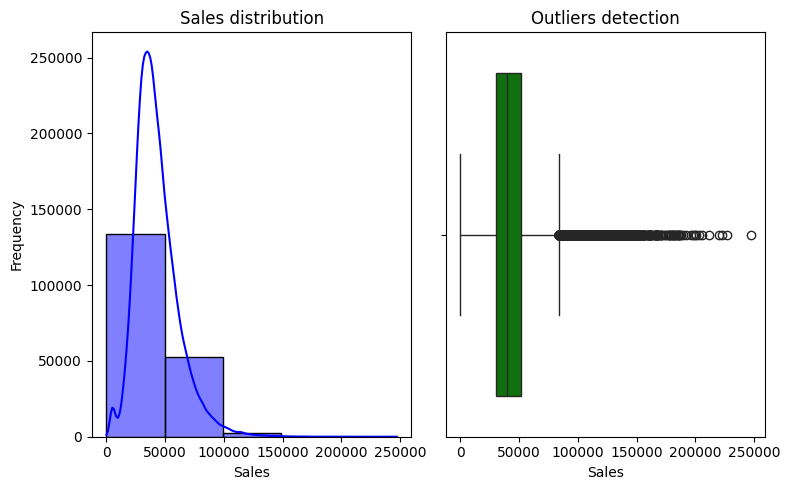

In [12]:
# Sales distribution
plt.figure(figsize=(8, 5))

plt.subplot(121)
sns.histplot(df['Sales'], kde=True, color='blue', bins=5)
plt.title('Sales distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()

plt.subplot(122)
sns.boxplot(x=df['Sales'], color='green')
plt.title('Outliers detection')
plt.xlabel('Sales')
plt.tight_layout()

>####  ***Orders***

**Central Tendency:**

The mean (68) and median (63) are fairly close, suggesting that the data is somewhat symmetrical.

**Dispersion:**

The standard deviation of 30 indicates that there is moderate variability in sales values.

**Skewness:**

Since the mean is slightly greater than the median, the data may be right-skewed (positively skewed), there might be few very high Orders present in data which is pulling the distribution to the right.

**Percentiles:**

The 25th percentile (Q1) is 48, the median (50th percentile) is 63, and the 75th percentile (Q3) is 82 which shows that half of the sales lies around 48 & 82. Therefore, the majority of Orders are clustered around these values, with a few very low or very high sales figures outside this range.


**Outliers:**

Considering the range extends from 0 to 371 sales record of 0 could be a low-performing transaction, while 371 could be an unusually highest Order.

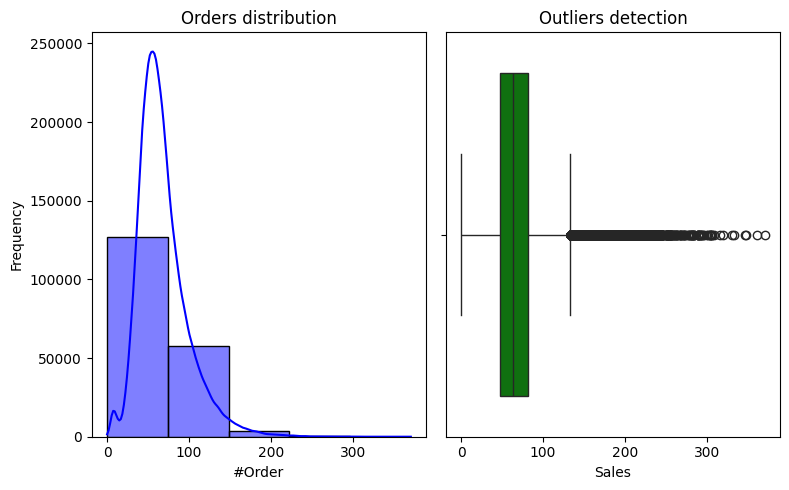

In [13]:
# Order distribution
plt.figure(figsize=(8, 5))

plt.subplot(121)
sns.histplot(df['#Order'], kde=True, color='blue', bins=5)
plt.title('Orders distribution')
plt.xlabel('#Order')
plt.ylabel('Frequency')
plt.tight_layout()

# Outliers detection
plt.subplot(122)
sns.boxplot(x=df['#Order'], color='green')
plt.title('Outliers detection')
plt.xlabel('Sales')
plt.tight_layout()

###**Bivariate Analysis**

As the analysation step of EDA, Basically it analyses the relationship between variables,
It is done to do following:
 - To analyse the
  - Strength of the Relationship
   - Direction of the Relationship
   - Significance
  -  Cause and Effect.



>####  ***Sales across Orders***


**Strength of the Relationship:**

 Since the correlation coefficient is to -1 or +1, it indicates the stronger the relationship between Sales & Orders.

**Direction of the Relationship:**

 As we can see as Order increases, Sales also gets increased, so we can conclude its positively correlated.

**Significance:**

  Statistical tests shows that observed relationship is statistically significant.

Correlation between Sales and #Order:
            Sales    #Order
Sales   1.000000  0.941601
#Order  0.941601  1.000000


<Axes: >

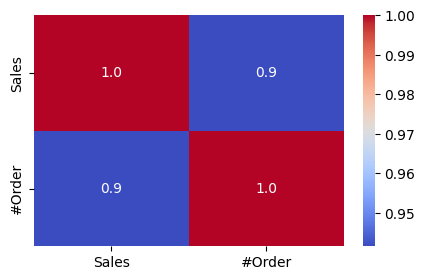

In [14]:
#Compute correlation between numerical variables (Sales and #Order)
correlation = df[['Sales', '#Order']].corr()
print("Correlation between Sales and #Order:\n", correlation)

# Visual representation
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')

In [15]:
#T-Test: figuring out the significnce
#H0: Increase of sales is not related to Order
#Ha: Sales Increases as Order increases

Sales = df['Sales']
Orders = df['#Order']
t_stat, p_value = stats.ttest_ind(Sales, Orders)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: Sales Increases as Order increases")
else:
    print("Fail to reject the null hypothesis: Sales increase is not related to Order")


print("-------------------------------------------------------------------------------------------")

# Chi-Square Test: Association Between Order & Sales
#H0: There is no significant association between Sales & Order.
#Ha: There is a significant association between Sales & Order.

data = df[['Sales', '#Order']].corr()
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(data)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value_chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation:
if p_value_chi2 < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Order.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Order.")


T-Statistic: 1004.4036077214703
P-Value: 0.0
Reject the null hypothesis: Sales Increases as Order increases
-------------------------------------------------------------------------------------------

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[0.97080028 0.97080028]
 [0.97080028 0.97080028]]
Fail to reject the null hypothesis: There is a significant association between Sales & Order.


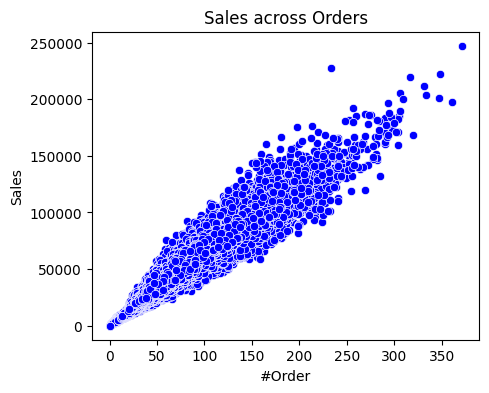

In [16]:
# Sales across Orders
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='#Order', y='Sales', color='blue')
plt.title('Sales across Orders')
plt.xlabel('#Order')
plt.ylabel('Sales')
plt.show()




>####  ***Sales vs Discount***


**Strength of the Relationship:**

 Since the correlation coefficient is 0.3, it indicates the weak to moderate positive relationship.

**Direction of the Relationship:**

 Since the correlation coefficient is 0.3, there is a positive relationship between Sales and Discount.
 which means as the discount increases, sales tend to increase, although the relationship is weak to moderate.

**Significance:**

  Statistical tests shows that the relationship has very less statistical significance.

In [17]:
df_discount = df
df_discount['Discount'] = df_discount['Discount'].replace({'Yes': 1, 'No': 0})

<ipython-input-17-b4e43a0972e6>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Correlation between Sales and #Order:
              Sales  Discount
Sales     1.000000  0.323906
Discount  0.323906  1.000000


<Axes: >

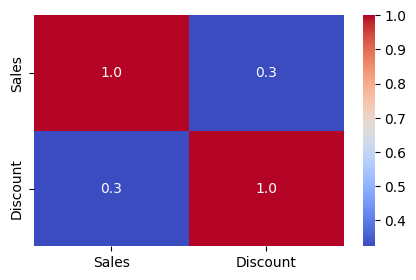

In [18]:
#Compute correlation between numerical variables (Sales and Discount)
correlation = df_discount[['Sales', 'Discount']].corr()
print("Correlation between Sales and #Order:\n", correlation)

# Visual representation
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')

In [19]:
#T-Test: figuring out the significnce
#H0: Discount increases the sales
#Ha: Discount doesnot increases the sales

Sales = df_discount['Sales']
Discount = df_discount['Discount']
t_stat, p_value = stats.ttest_ind(Sales, Discount)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: Discount increases the sales")
else:
    print("Fail to reject the null hypothesis: Discount doesnot increases the sales")


print("-------------------------------------------------------------------------------------------")

# Chi-Square Test: Association Between Discount & Sales
#H0: There is no significant association between Sales & Discount.
#Ha: There is a significant association between Sales & Discount.

data = df_discount[['Sales', 'Discount']].corr()
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(data)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value_chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation:
if p_value_chi2 < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Discount.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Discount.")


T-Statistic: 1005.9982063352667
P-Value: 0.0
Reject the null hypothesis: Discount increases the sales
-------------------------------------------------------------------------------------------

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[0.66195307 0.66195307]
 [0.66195307 0.66195307]]
Fail to reject the null hypothesis: There is a significant association between Sales & Discount.


<ipython-input-20-9b5eec569972>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




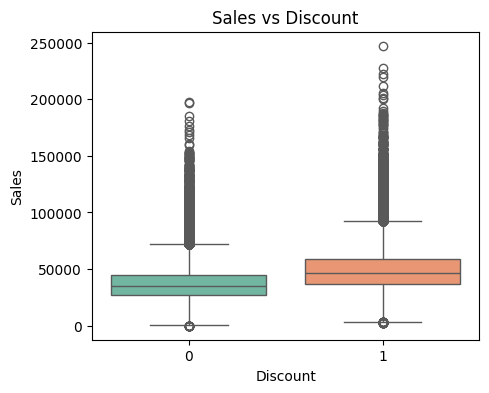

In [20]:
# Sales vs Discount
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Discount', y='Sales', palette='Set2')
plt.title('Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()



>####  ***Sales vs Holiday***


**Strength of the Relationship:**

 Since the correlation coefficient is -0.2, it indicates no relationship between Sales & Holiday.

**Direction of the Relationship:**

 Since the correlation coefficient is -0.2, there is a Negative relationship between Sales and Holiday.
 Which means holiday has no effect on Sales increase.


**Significance:**

  Statistical tests shows that the relationship has no statistical significance.

Correlation between Sales and Holiday:
             Sales   Holiday
Sales    1.000000 -0.154779
Holiday -0.154779  1.000000


<Axes: >

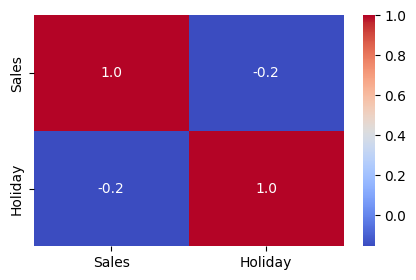

In [21]:
#Compute correlation between numerical variables (Sales and Holiday)
correlation = df_discount[['Sales', 'Holiday']].corr()
print("Correlation between Sales and Holiday:\n", correlation)

# Visual representation
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')

In [22]:
#T-Test: figuring out the significnce
#H0: Holiday increases the sales
#Ha: Holiday doesnot increases the sales

Sales = df_discount['Sales']
Holiday = df_discount['Holiday']
t_stat, p_value = stats.ttest_ind(Sales, Holiday)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: Holiday increases the sales")
else:
    print("Fail to reject the null hypothesis: Holiday doesnot increases the sales")


print("-------------------------------------------------------------------------------------------")

# Chi-Square Test: Association Between Holiday & Sales
#H0: There is no significant association between Sales & Holiday.
#Ha: There is a significant association between Sales & Holiday.

data = df_discount[['Sales', 'Holiday']].corr()
data[data < 0] = 0
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(data)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value_chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation:
if p_value_chi2 < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Holiday.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Holiday.")


T-Statistic: 1006.0056309953759
P-Value: 0.0
Reject the null hypothesis: Holiday increases the sales
-------------------------------------------------------------------------------------------

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[0.5 0.5]
 [0.5 0.5]]
Fail to reject the null hypothesis: There is a significant association between Sales & Holiday.


<ipython-input-23-ff9b74c10e84>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




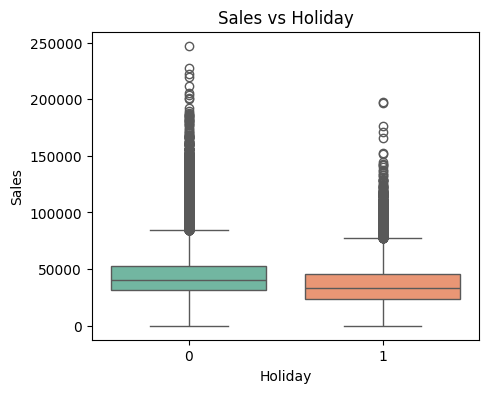

In [23]:
# Sales vs Holiday
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Holiday', y='Sales', palette='Set2')
plt.title('Sales vs Holiday')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()



>####  ***Sales vs Store_type***


**Median :**

  Median of store S4 seems to be higher than other stores, we can assume that in S4 location the sales is quite high compared to ther stores.

**Interquartile Range (IQR):**

  Similarly, IQR for S4 seems to be wider than other stores IQR, so we can assume that in S4 location the sales is quite high compared to ther stores.


**Whiskers:**

  From below we can see that the whiskers of S4 is quite big which indicates that the sales are more spread out in S4.

**Outliers:**

  For Outlier too S4 stands out, where there are more variations among sales done by customers.

In [24]:
from scipy import stats

# Store_Type category
one = df[df['Store_Type'] == 'S1']['Sales']
two = df[df['Store_Type'] == 'S2']['Sales']
three = df[df['Store_Type'] == 'S3']['Sales']
four = df[df['Store_Type'] == 'S4']['Sales']
f_stat, p_value = stats.f_oneway(one, two,three,four)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Store_Type.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Store_Type.")


F-Statistic: 35123.64411601774
P-Value: 0.0
Reject the null hypothesis: There is no significant association between Sales & Store_Type.


<ipython-input-25-18ad79744faf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




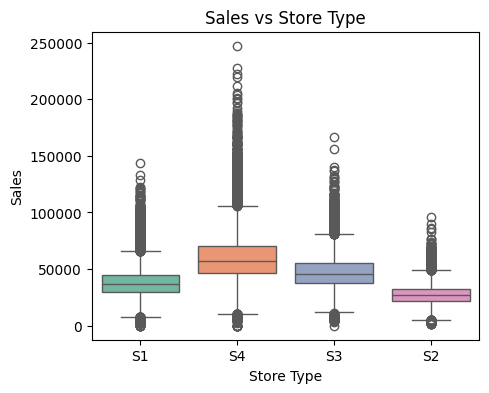

In [25]:
# Sales vs Store Type
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Store_Type', y='Sales', palette='Set2')
plt.title('Sales vs Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()




>####  ***Sales vs Location_Type***


**Median :**

  Median of store L2 seems to be higher than other stores, we can assume that in L2 location the sales is quite high compared to ther stores.

**Interquartile Range (IQR):**

  Similarly, IQR for L2 seems to be wider than other stores IQR, so we can assume that in L2 location the sales is quite high compared to ther stores.


**Whiskers:**

  From below we can see that the whiskers of L2 is quite big which indicates that the sales are more spread out in L2.

**Outliers:**

  For Outlier too L2 stands out, where there are more variations among sales done by customers.

In [26]:
from scipy import stats

# Location_Type category
one = df[df['Location_Type'] == 'L1']['Sales']
two = df[df['Location_Type'] == 'L2']['Sales']
three = df[df['Location_Type'] == 'L3']['Sales']
four = df[df['Location_Type'] == 'L4']['Sales']
five = df[df['Location_Type'] == 'L5']['Sales']
f_stat, p_value = stats.f_oneway(one, two,three,four,five)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Location_Type.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Location_Type.")


F-Statistic: 25338.873708475992
P-Value: 0.0
Reject the null hypothesis: There is no significant association between Sales & Location_Type.


<ipython-input-27-b2538c3cafa6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




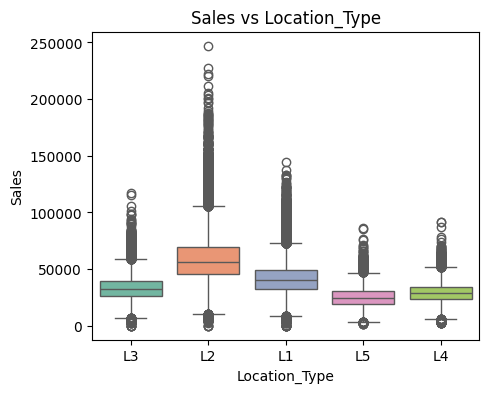

In [27]:
# Sales vs Location_Type
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Location_Type', y='Sales', palette='Set2')
plt.title('Sales vs Location_Type')
plt.xlabel('Location_Type')
plt.ylabel('Sales')
plt.show()




>####  ***Sales vs Region_Code***


**Median :**

  Median of store R1 seems to be higher than other stores, we can assume that in R1 location the sales is quite high compared to ther stores.

**Interquartile Range (IQR):**

  Similarly, IQR for R1 seems to be wider than other stores IQR, so we can assume that in R1 location the sales is quite high compared to ther stores.


**Whiskers:**

  From below we can see that the whiskers of R1 is quite big which indicates that the sales are more spread out in R1.

**Outliers:**

  For Outlier too R1 stands out, where there are more variations among sales done by customers.

In [28]:
from scipy import stats

# Location_Type category
one = df[df['Region_Code'] == 'R1']['Sales']
two = df[df['Region_Code'] == 'R2']['Sales']
three = df[df['Region_Code'] == 'R3']['Sales']
four = df[df['Region_Code'] == 'R4']['Sales']
f_stat, p_value = stats.f_oneway(one, two,three,four)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is no significant association between Sales & Region_Code.")
else:
    print("Fail to reject the null hypothesis: There is a significant association between Sales & Region_Code.")


F-Statistic: 1682.4255287950677
P-Value: 0.0
Reject the null hypothesis: There is no significant association between Sales & Region_Code.


<ipython-input-29-540c97fe78b5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




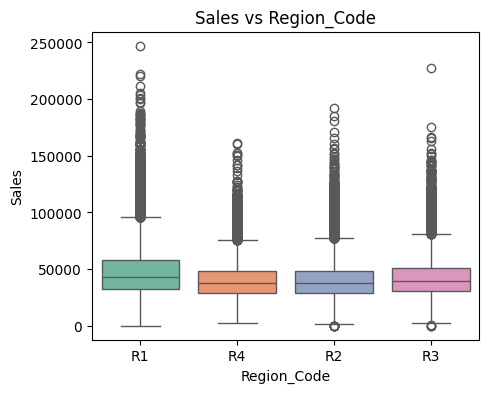

In [29]:
# Sales vs Region_Code
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Region_Code', y='Sales', palette='Set2')
plt.title('Sales vs Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Sales')
plt.show()

###**Time Series Analysis**

The time series plot shows the total sales over time.
It is done to determine the following:
 - Trend
 - Seasonality
 - Outliers



>####  ***Time Series Analysis***


**Trend Component::**

However from the given data sales variations are quite high, but in the last month of the given data sales is towards upward trend, so we can assume that there is a gradual increase in sales.

**Seasonal Component:**

Repeating fluctuations are found in the given data that occur at specific periods, consistent peaks are found after April month maybe due to seasonality i-e. holidays


**Residual Component (Noise):**

The data is scattered randomly and there are no patterns to be found which indicates the proper decomposition.

**Forecasting:**

In addition to the above forecating is also done for next 6 months down the line, which shows the cosistent sales, means there is no steep downfall in the sales.

In [30]:
df_t = df
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['year'] = df_t['Date'].dt.year
df_t['month'] = df_t['Date'].dt.month
df_t.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1


<ipython-input-31-f7f918dc1af6>:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



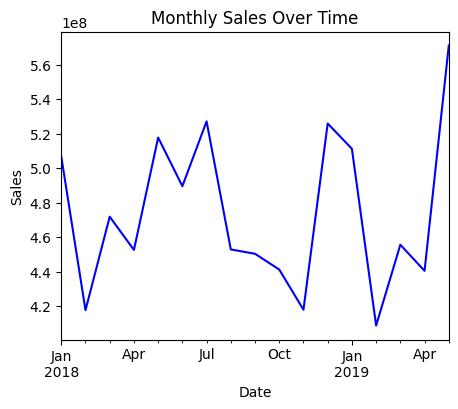

In [31]:
df_t.set_index('Date', inplace=True)

# Grouping by month, summing up sales
monthly_sales = df_t.resample('M')['Sales'].sum()

# Time series plot
plt.figure(figsize=(5, 4))
monthly_sales.plot(title="Monthly Sales Over Time", xlabel="Date", ylabel="Sales", color='blue')
plt.show()

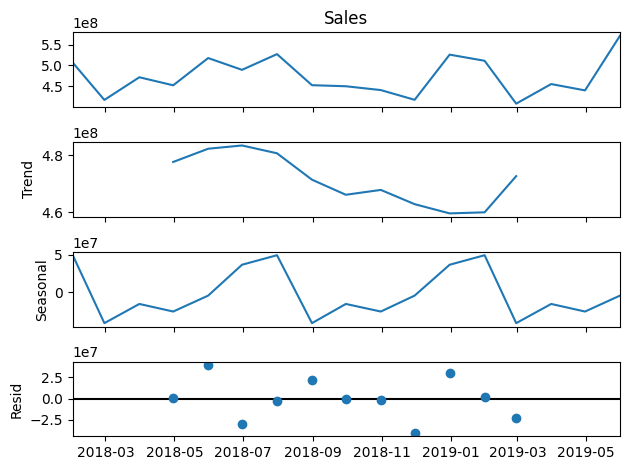

In [32]:
register_matplotlib_converters()
# Decompose the time series for period=6
decomposition = seasonal_decompose(monthly_sales, model='additive', period=6)
decomposition.plot()
plt.show()

<ipython-input-33-fb8ba4de957d>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



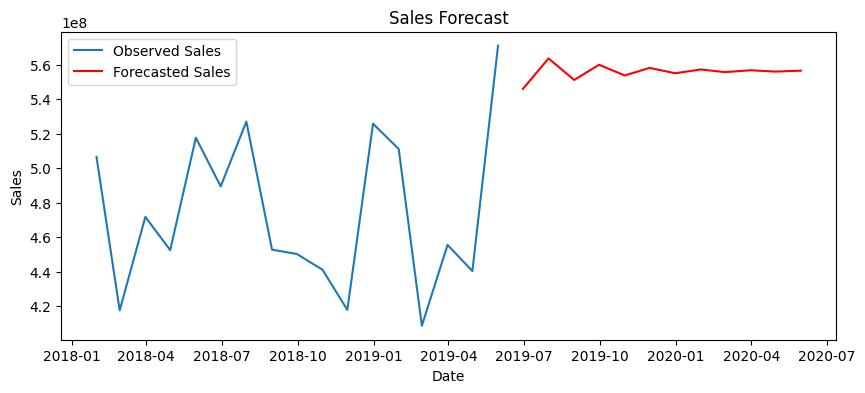

In [33]:
# ARIMA model for forecasting
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Making predictions
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=13, freq='M')[1:]

plt.figure(figsize=(10, 4))
plt.plot(monthly_sales, label='Observed Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

###**Categorical Analysis**

**Frequency Distribution:**

A simple calculation of how often each category appears in the dataset.

**Contingency Tables:**

Via which the relationships between categorical variables are analysed.


**Chi-Square Test:**

It is mainly done to determine if there is a significant relationship between two categorical variables.

Above tests will be done from the given data, from which we are analysing if below relationships are present,
 - Holiday & Discount impact on
  - Store_Type
  - Location_Type
  - Region_Code

From the below inferences we can quite come to assumption that there are no significant relationships between any of the categorical variables.

Frequency of Store_Type:
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Frequency of Location_Type:
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Frequency of Region_Code:
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64

Frequency of Holiday:
Holiday
0    163520
1     24820
Name: count, dtype: int64

Frequency of Discount:
Discount
0    104051
1     84289
Name: count, dtype: int64


<ipython-input-34-6c3cf5dc9bd7>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




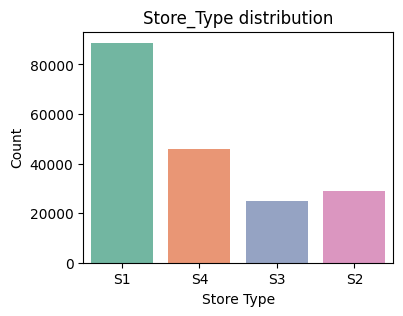

<ipython-input-34-6c3cf5dc9bd7>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




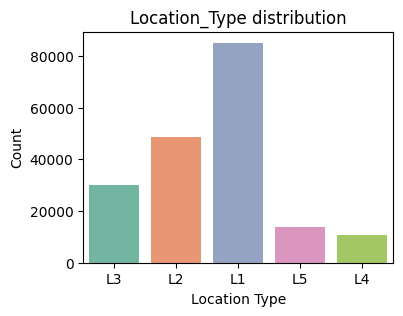

<ipython-input-34-6c3cf5dc9bd7>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




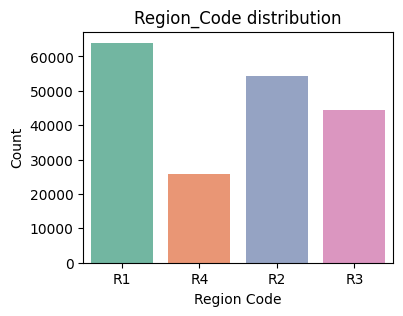

<ipython-input-34-6c3cf5dc9bd7>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




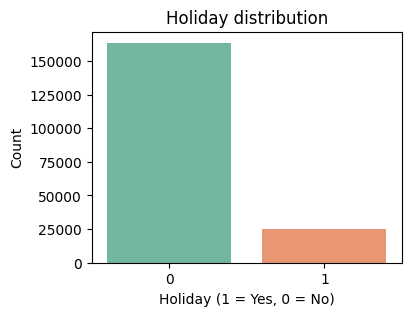

<ipython-input-34-6c3cf5dc9bd7>:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




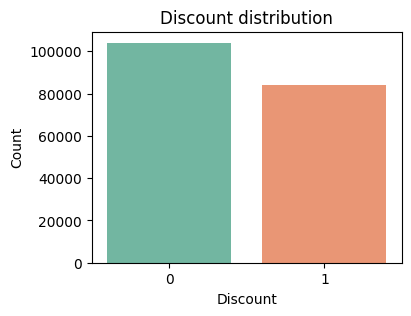

In [34]:
# Analyzing frequency counts of categorical variables
print("Frequency of Store_Type:")
print(df['Store_Type'].value_counts())

print("\nFrequency of Location_Type:")
print(df['Location_Type'].value_counts())

print("\nFrequency of Region_Code:")
print(df['Region_Code'].value_counts())

print("\nFrequency of Holiday:")
print(df['Holiday'].value_counts())

print("\nFrequency of Discount:")
print(df['Discount'].value_counts())

# Store_Type plot
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Store_Type', palette='Set2')
plt.title('Store_Type distribution')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

# Location_Type plot
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Location_Type', palette='Set2')
plt.title('Location_Type distribution')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

# Region_Code plot
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Region_Code', palette='Set2')
plt.title('Region_Code distribution')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()

# Holiday plot
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Holiday', palette='Set2')
plt.title('Holiday distribution')
plt.xlabel('Holiday (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Discount plot
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Discount', palette='Set2')
plt.title('Discount distribution')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()



Holiday impact on,
 - Store_Type
 - Location_Type
 - Region_Code

In [35]:
# Creating contingency table
contingency_table_H_Store_Type = pd.crosstab(df['Holiday'], df['Store_Type'])
print("contingency_table_H_Store_Type:\n", contingency_table_H_Store_Type)
print("")

contingency_table_H_Location_Type = pd.crosstab(df['Holiday'], df['Location_Type'])
print("contingency_table_H_Location_Type:\n", contingency_table_H_Location_Type)
print("")

contingency_table_H_Region_Code = pd.crosstab(df['Holiday'], df['Region_Code'])
print("contingency_table_H_Location_Type:\n", contingency_table_H_Region_Code)
print("")
print("-----------------------------------------------------------------------")

# Chi-Square Test
# H0: There is no relationship
# Ha: There is relationship
chi2, p_value, dof, expected = chi2_contingency(contingency_table_H_Store_Type)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Holiday & Store_Type.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Holiday & Store_Type.")

print("-----------------------------------------------------------------------")

chi2, p_value, dof, expected = chi2_contingency(contingency_table_H_Location_Type)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Holiday & Location_Type.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Holiday & Location_Type.")


print("-----------------------------------------------------------------------")

chi2, p_value, dof, expected = chi2_contingency(contingency_table_H_Region_Code)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Holiday & Region_Code.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Holiday & Region_Code.")


contingency_table_H_Store_Type:
 Store_Type     S1     S2     S3     S4
Holiday                               
0           77056  25088  21504  39872
1           11696   3808   3264   6052

contingency_table_H_Location_Type:
 Location_Type     L1     L2     L3    L4     L5
Holiday                                        
0              73920  42112  25984  9408  12096
1              11220   6392   3944  1428   1836

contingency_table_H_Location_Type:
 Region_Code     R1     R2     R3     R4
Holiday                                
0            55552  47040  38528  22400
1             8432   7140   5848   3400

-----------------------------------------------------------------------
Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 3
Expected Frequencies:
 [[77056. 25088. 21504. 39872.]
 [11696.  3808.  3264.  6052.]]
Fail to reject the null hypothesis: There is no relationship between Holiday & Store_Type.
-----------------------------------------------------------------------
Ch

Discount impact on,
 - Store_Type
 - Location_Type
 - Region_Code

In [36]:
# Creating contingency table
contingency_table_D_Store_Type = pd.crosstab(df['Discount'], df['Store_Type'])
print("contingency_table_D_Store_Type:\n", contingency_table_D_Store_Type)
print("")

contingency_table_D_Location_Type = pd.crosstab(df['Discount'], df['Location_Type'])
print("contingency_table_D_Location_Type:\n", contingency_table_D_Location_Type)
print("")

contingency_table_D_Region_Code = pd.crosstab(df['Discount'], df['Region_Code'])
print("contingency_table_D_Location_Type:\n", contingency_table_D_Region_Code)
print("")
print("-----------------------------------------------------------------------")

# Chi-Square Test
# H0: There is no relationship
# Ha: There is relationship
chi2, p_value, dof, expected = chi2_contingency(contingency_table_D_Store_Type)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Discount & Store_Type.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Discount & Store_Type.")

print("-----------------------------------------------------------------------")

chi2, p_value, dof, expected = chi2_contingency(contingency_table_D_Location_Type)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Discount & Location_Type.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Discount & Location_Type.")


print("-----------------------------------------------------------------------")

chi2, p_value, dof, expected = chi2_contingency(contingency_table_D_Region_Code)
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between Discount & Region_Code.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between Discount & Region_Code.")


contingency_table_D_Store_Type:
 Store_Type     S1     S2     S3     S4
Discount                              
0           49093  16025  13627  25306
1           39659  12871  11141  20618

contingency_table_D_Location_Type:
 Location_Type     L1     L2     L3    L4    L5
Discount                                      
0              47114  26721  16507  6007  7702
1              38026  21783  13421  4829  6230

contingency_table_D_Location_Type:
 Region_Code     R1     R2     R3     R4
Discount                               
0            35307  30036  24449  14259
1            28677  24144  19927  11541

-----------------------------------------------------------------------
Chi-Square Statistic: 1.5849704434955905
P-Value: 0.6628024520364906
Degrees of Freedom: 3
Expected Frequencies:
 [[49032.25205479 15963.9890411  13683.41917808 25371.33972603]
 [39719.74794521 12932.0109589  11084.58082192 20552.66027397]]
Fail to reject the null hypothesis: There is no relationship between Discou

###**Handling Missing Values**

Missing values needs to be handled mainly to ensure below,
 - Accuracy
 - Data Integrity &
 - Bias Prevention

 From the given data we could see that there are no missing values present, which makes it easier for futhre Imputations & Analysations





In [37]:
# Checking for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
#Order           0
Sales            0
year             0
month            0
dtype: int64


<Axes: >

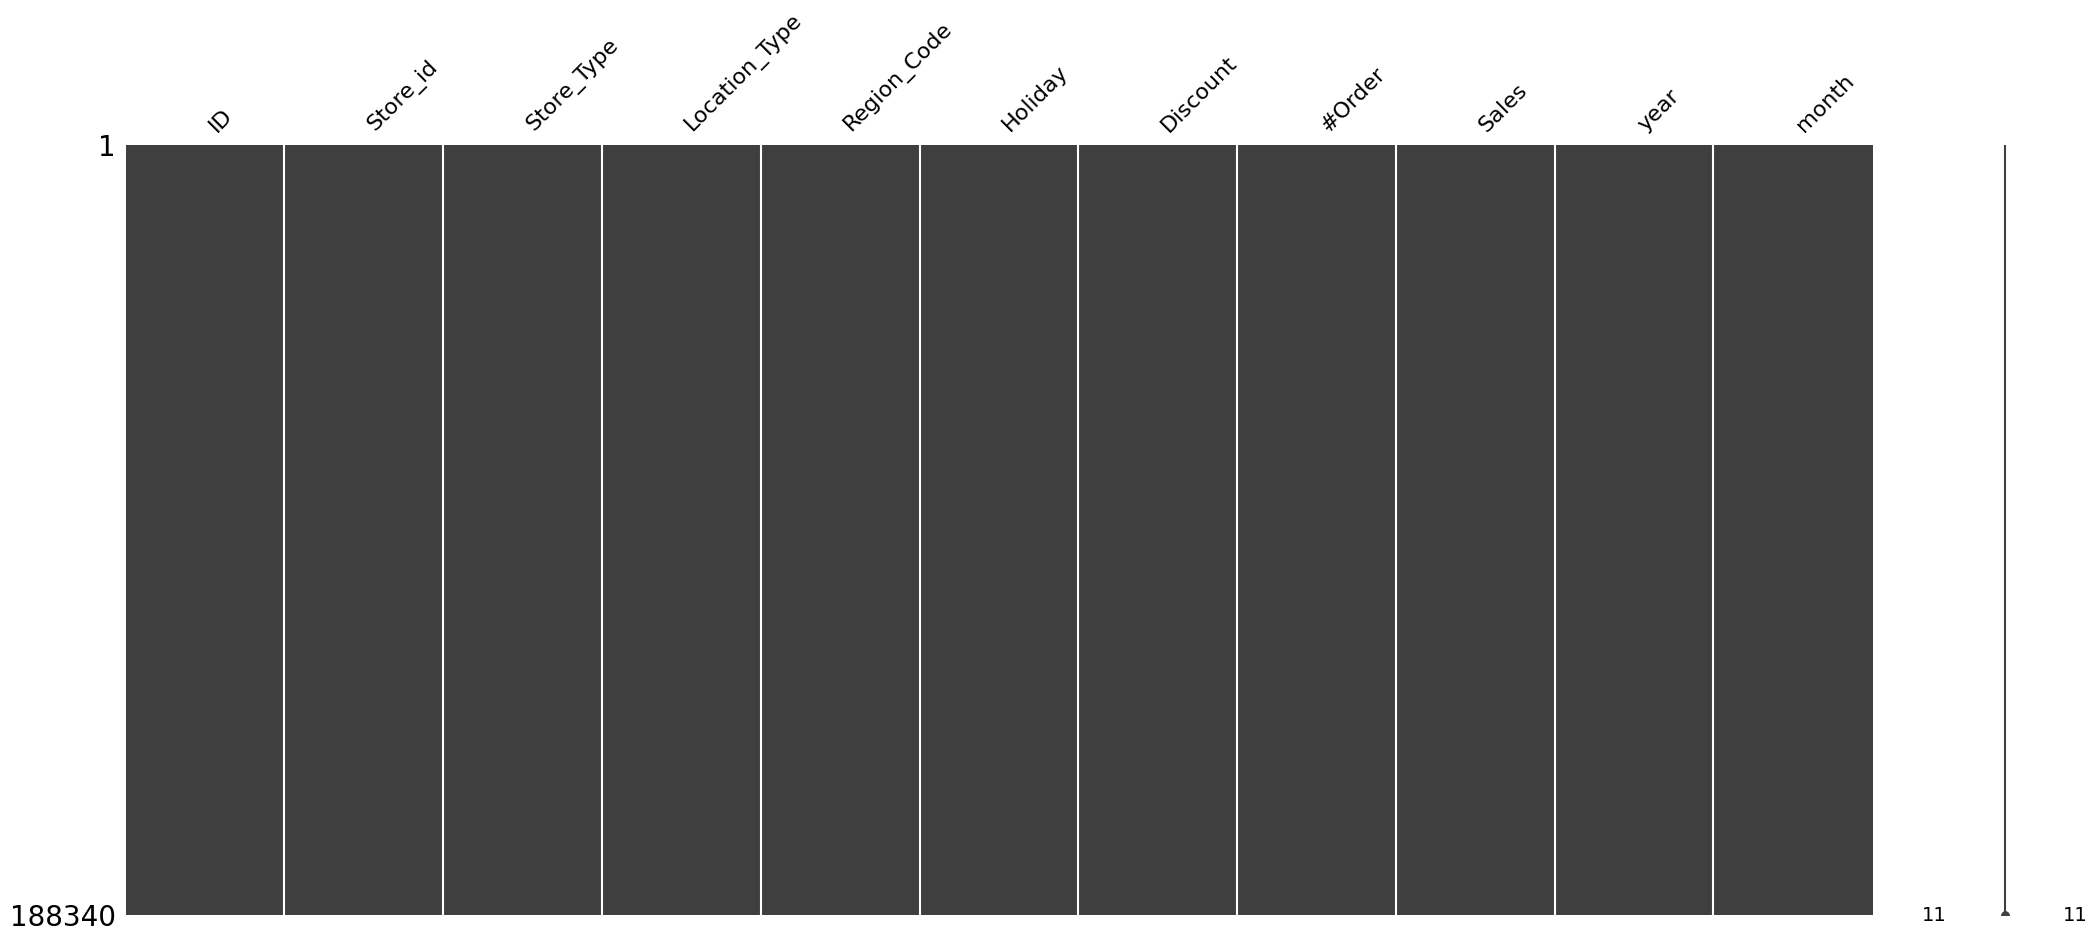

In [38]:
# Visualize missing data
msno.matrix(df)

###**Outlier Detection**

It is mainly done to identify data points that are significantly different from the majority of the data in order to decide whether to correct them, or remove them from the analysis. It mainly helps in below,
 - Improving Model Accuracy
 - Data Quality
 - Insights

From the given data we could see there are quite high outliers present, Further Z & IQR test has been done to micro analyse the outliers present inside the given data.

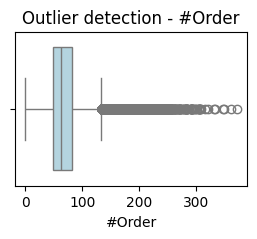

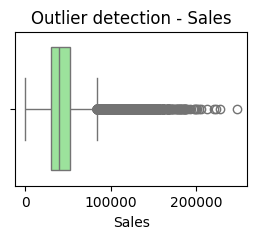

In [39]:
# Outlier detection - '#Order'
plt.figure(figsize=(3, 2))
sns.boxplot(data=df, x='#Order', color='lightblue')
plt.title('Outlier detection - #Order')
plt.show()

# Outlier detection - 'Sales'
plt.figure(figsize=(3, 2))
sns.boxplot(data=df, x='Sales', color='lightgreen')
plt.title('Outlier detection - Sales')
plt.show()


In [40]:
# Z-Score Outlier detection
df['Z_score_Order'] = zscore(df['#Order'])
df['Z_score_Sales'] = zscore(df['Sales'])

# Z-score threshold
z_score_threshold = 3

# Outliers detection
outliers_zscore_order = df[df['Z_score_Order'].abs() > z_score_threshold]
outliers_zscore_sales = df[df['Z_score_Sales'].abs() > z_score_threshold]
print("Outliers based on Z-Score for #Order:")
print(outliers_zscore_order[['ID', '#Order', 'Z_score_Order']])

print("\nOutliers based on Z-Score for Sales:")
print(outliers_zscore_sales[['ID', 'Sales', 'Z_score_Sales']])

Outliers based on Z-Score for #Order:
                  ID  #Order  Z_score_Order
Date                                       
2018-01-01  T1000307     180       3.669317
2018-01-02  T1000494     189       3.964715
2018-01-02  T1000595     167       3.242631
2018-01-02  T1000624     181       3.702139
2018-01-03  T1000787     189       3.964715
...              ...     ...            ...
2019-05-30  T1187690     173       3.439563
2019-05-30  T1187795     180       3.669317
2019-05-31  T1188037     168       3.275453
2019-05-31  T1188242     179       3.636495
2019-05-31  T1188321     171       3.373919

[2664 rows x 3 columns]

Outliers based on Z-Score for Sales:
                  ID      Sales  Z_score_Sales
Date                                          
2018-01-01  T1000181  115665.30       3.948763
2018-01-01  T1000307  126633.00       4.543004
2018-01-02  T1000374  105243.00       3.384072
2018-01-02  T1000404  104433.00       3.340186
2018-01-02  T1000467  101577.00       3.18544

In [41]:
# IQR Method Outlier detection
Q1_order = df['#Order'].quantile(0.25)
Q3_order = df['#Order'].quantile(0.75)
IQR_order = Q3_order - Q1_order
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# IQR Outlier ranges
lower_bound_order = Q1_order - 1.5 * IQR_order
upper_bound_order = Q3_order + 1.5 * IQR_order
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Outliers detection
outliers_iqr_order = df[(df['#Order'] < lower_bound_order) | (df['#Order'] > upper_bound_order)]
outliers_iqr_sales = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]
print("\nOutliers based on IQR for #Order:")
print(outliers_iqr_order[['ID', '#Order']])
print("\nOutliers based on IQR for Sales:")
print(outliers_iqr_sales[['ID', 'Sales']])


Outliers based on IQR for #Order:
                  ID  #Order
Date                        
2018-01-01  T1000181     154
2018-01-01  T1000307     180
2018-01-02  T1000374     142
2018-01-02  T1000398     146
2018-01-02  T1000404     145
...              ...     ...
2019-05-31  T1188242     179
2019-05-31  T1188300     151
2019-05-31  T1188321     171
2019-05-31  T1188322     152
2019-05-31  T1188333     137

[7089 rows x 2 columns]

Outliers based on IQR for Sales:
                  ID      Sales
Date                           
2018-01-01  T1000078   85426.92
2018-01-01  T1000134   86962.68
2018-01-01  T1000181  115665.30
2018-01-01  T1000188   86203.20
2018-01-01  T1000307  126633.00
...              ...        ...
2019-05-31  T1188244   90231.54
2019-05-31  T1188300   95497.92
2019-05-31  T1188321  110414.28
2019-05-31  T1188322   87785.70
2019-05-31  T1188333   86994.18

[5843 rows x 2 columns]
